In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df_us_20208 = pd.read_csv('Resources/us202208.csv')

df_us_20208

,D1_A,D1_G,Q1,VAXANY,VAXCOUNT,VAXBRAND,VAXJJ,newv3_1,newv3_2,newv3_3,...,D7_1,D8,D9,D9b,D13,D14,D15,wt,wt_multi,wt_parent0
0,42,2,1,2,.,.,.,.,.,.,...,4,3,1,.,1,2,4,0.50954,0.60390,.
1,30,1,1,1,3,1,1,1,.,.,...,1,2,1,.,2,2,3,0.90294,1.07015,.
2,32,1,1,1,2,4,2,1,.,1,...,3,2,1,.,2,2,7,0.50072,0.59344,0.40675
3,30,2,1,1,2,1,2,.,.,.,...,1,1,1,.,1,1,7,0.60841,0.72108,.
4,33,2,1,1,2,1,2,1,1,1,...,1,2,1,.,1,2,6,0.54509,0.64604,0.27592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,21,2,1,2,.,.,.,.,.,.,...,.,1,4,.,2,2,4,0.25909,0.30706,.
696,21,1,1,1,1,2,.,1,1,1,...,.,1,1,.,2,2,7,0.29503,0.34967,0.25
697,31,1,1,2,.,.,.,.,.,.,...,4,3,2,.,2,2,5,0.80229,0.95087,.
698,66,2,1,1,3,1,2,1,1,1,...,3,2,7,.,2,2,5,2.98312,3.53555,.


In [38]:
# # Rename columns needed.
df_us_20208_summary = df_us_20208.rename(columns={
                                        "D1_A": "AGE",
                                        "D1_G": "GENDER",
                                        "VAXANY": "VACCINE STATUS",
                                        "L7": "TRUST",
                                        "Xp6": "POS-CASES",
                                        "CVAX4": "TRUST GOV",
                                        "D0": "HEALTHY",
                                        "D2": "STATE",
                                        "D3": "RURAL",
                                        "D4": "INCOME",
                                        "D5_E": "HISPANIC",
                                        "D5_M": "RACE",
                                        "D6": "RELIGION",
                                        "D6_E": "RELIGIOUS",
                                        "D7": "HEALTH COVERAGE",
                                        "D8": "POLITICS",
                                        "D9": "WORK STATUS",
                                        "D13": "ILLNESS",
                                        "D15": "EDUCATION",
                                         })

df_us_20208_summary



,AGE,GENDER,Q1,VACCINE STATUS,VAXCOUNT,VAXBRAND,VAXJJ,newv3_1,newv3_2,newv3_3,...,D7_1,POLITICS,WORK STATUS,D9b,ILLNESS,D14,EDUCATION,wt,wt_multi,wt_parent0
0,42,2,1,2,.,.,.,.,.,.,...,4,3,1,.,1,2,4,0.50954,0.60390,.
1,30,1,1,1,3,1,1,1,.,.,...,1,2,1,.,2,2,3,0.90294,1.07015,.
2,32,1,1,1,2,4,2,1,.,1,...,3,2,1,.,2,2,7,0.50072,0.59344,0.40675
3,30,2,1,1,2,1,2,.,.,.,...,1,1,1,.,1,1,7,0.60841,0.72108,.
4,33,2,1,1,2,1,2,1,1,1,...,1,2,1,.,1,2,6,0.54509,0.64604,0.27592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,21,2,1,2,.,.,.,.,.,.,...,.,1,4,.,2,2,4,0.25909,0.30706,.
696,21,1,1,1,1,2,.,1,1,1,...,.,1,1,.,2,2,7,0.29503,0.34967,0.25
697,31,1,1,2,.,.,.,.,.,.,...,4,3,2,.,2,2,5,0.80229,0.95087,.
698,66,2,1,1,3,1,2,1,1,1,...,3,2,7,.,2,2,5,2.98312,3.53555,.


In [39]:
# Organize the data to only show the columns needed.
df_organized_us_20208 = df_us_20208_summary[["AGE", "GENDER", "VACCINE STATUS", "TRUST", "POS-CASES", "TRUST GOV", "HEALTHY", "STATE", "RURAL", "INCOME", "HISPANIC", "RACE", "RELIGION", "RELIGIOUS", "HEALTH COVERAGE", "POLITICS", "WORK STATUS", "ILLNESS", "EDUCATION"]]
df_organized_us_20208
df_organized_us_20208['EDUCATION'].value_counts()

EDUCATION
6    203
5    179
4    157
7    117
3     22
2     14
1      8
Name: count, dtype: int64

In [40]:
# Dictionary mapping numerical values to gender labels
numerical_to_gender = {1: 'Male', 2: 'Female', 3: 'Other'}

# Replace numerical values with gender labels in the GENDER column
df_organized_us_20208.loc[:, 'GENDER'] = df_organized_us_20208['GENDER'].map(numerical_to_gender)
df_organized_us_20208



,AGE,GENDER,VACCINE STATUS,TRUST,POS-CASES,TRUST GOV,HEALTHY,STATE,RURAL,INCOME,HISPANIC,RACE,RELIGION,RELIGIOUS,HEALTH COVERAGE,POLITICS,WORK STATUS,ILLNESS,EDUCATION
0,42,Female,2,5,2,.,4,26,1,2,2,.,12,.,1,3,1,1,4
1,30,Male,1,5,1,.,2,33,2,7,2,.,11,.,1,2,1,2,3
2,32,Male,1,4,1,2,1,33,2,7,2,.,7,.,1,2,1,2,7
3,30,Female,1,5,2,.,3,15,2,7,2,.,1,1,1,1,1,1,7
4,33,Female,1,5,.,1,1,33,1,8,2,.,2,1,1,2,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,21,Female,2,3,.,.,2,5,2,8,2,.,12,.,2,1,4,2,4
696,21,Male,1,4,1,1,2,33,2,2,2,.,2,1,2,1,1,2,7
697,31,Male,2,1,.,.,1,44,2,3,2,.,12,.,1,3,2,2,5
698,66,Female,1,4,1,.,1,50,1,5,2,.,1,2,1,2,7,2,5


In [41]:
# Dictionary mapping numerical values to vaccine status
numerical_to_vaccine_status = {1: 'Yes', 2: 'No'}

# Replace numerical values with vaccine status
df_organized_us_20208.loc[:, 'VACCINE STATUS'] = df_organized_us_20208['VACCINE STATUS'].map(numerical_to_vaccine_status)
df_organized_us_20208

,AGE,GENDER,VACCINE STATUS,TRUST,POS-CASES,TRUST GOV,HEALTHY,STATE,RURAL,INCOME,HISPANIC,RACE,RELIGION,RELIGIOUS,HEALTH COVERAGE,POLITICS,WORK STATUS,ILLNESS,EDUCATION
0,42,Female,No,5,2,.,4,26,1,2,2,.,12,.,1,3,1,1,4
1,30,Male,Yes,5,1,.,2,33,2,7,2,.,11,.,1,2,1,2,3
2,32,Male,Yes,4,1,2,1,33,2,7,2,.,7,.,1,2,1,2,7
3,30,Female,Yes,5,2,.,3,15,2,7,2,.,1,1,1,1,1,1,7
4,33,Female,Yes,5,.,1,1,33,1,8,2,.,2,1,1,2,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,21,Female,No,3,.,.,2,5,2,8,2,.,12,.,2,1,4,2,4
696,21,Male,Yes,4,1,1,2,33,2,2,2,.,2,1,2,1,1,2,7
697,31,Male,No,1,.,.,1,44,2,3,2,.,12,.,1,3,2,2,5
698,66,Female,Yes,4,1,.,1,50,1,5,2,.,1,2,1,2,7,2,5


In [42]:
df_organized_us_20208['HEALTHY'].value_counts()


HEALTHY
2    299
1    282
3     98
5     11
4     10
Name: count, dtype: int64

In [43]:
# Dictionary mapping numerical values to trust in vaccines
numerical_to_trust_vaccine = {'1': 'Strongly disagree', '2': 'Disagree', '3': 'Neither agree nor disagree', '4': 'Agree', '5': 'Strongly agree', '.': 'n/a'}

# Replace numerical values with trust in vaccine labels in the TRUST column
df_organized_us_20208.loc[:, 'TRUST'] = df_organized_us_20208['TRUST'].astype(str).map(numerical_to_trust_vaccine)
df_organized_us_20208

,AGE,GENDER,VACCINE STATUS,TRUST,POS-CASES,TRUST GOV,HEALTHY,STATE,RURAL,INCOME,HISPANIC,RACE,RELIGION,RELIGIOUS,HEALTH COVERAGE,POLITICS,WORK STATUS,ILLNESS,EDUCATION
0,42,Female,No,Strongly agree,2,.,4,26,1,2,2,.,12,.,1,3,1,1,4
1,30,Male,Yes,Strongly agree,1,.,2,33,2,7,2,.,11,.,1,2,1,2,3
2,32,Male,Yes,Agree,1,2,1,33,2,7,2,.,7,.,1,2,1,2,7
3,30,Female,Yes,Strongly agree,2,.,3,15,2,7,2,.,1,1,1,1,1,1,7
4,33,Female,Yes,Strongly agree,.,1,1,33,1,8,2,.,2,1,1,2,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,21,Female,No,Neither agree nor disagree,.,.,2,5,2,8,2,.,12,.,2,1,4,2,4
696,21,Male,Yes,Agree,1,1,2,33,2,2,2,.,2,1,2,1,1,2,7
697,31,Male,No,Strongly disagree,.,.,1,44,2,3,2,.,12,.,1,3,2,2,5
698,66,Female,Yes,Agree,1,.,1,50,1,5,2,.,1,2,1,2,7,2,5


In [44]:
# Dictionary mapping numerical values to gender labels
numerical_to_pos_cases= {'1':'Once', '2': 'Twice', '3': 'Three or more', '.': 'None'}
# Replace numerical values with gender labels in the GENDER column using .loc
df_organized_us_20208.loc[:,'POS-CASES'] = df_organized_us_20208['POS-CASES'].astype(str).map(numerical_to_pos_cases)
# Dictionary mapping numerical values to gender labels
numerical_to_trust_gov = {'1': 'I have not changed how much I trust them', '2': 'Now trust them more', 3: 'I now trust them less', '.': 'NA'}
# Replace numerical values with gender labels in the GENDER column using .loc
df_organized_us_20208.loc[:,'TRUST GOV'] = df_organized_us_20208['TRUST GOV'].astype(str).map(numerical_to_trust_gov)
# Dictionary mapping numerical values to gender labels
numerical_to_healthy = {'1': 'Very good', '2': 'Good', '3': 'Fair',  '4': 'Poor', '5': 'Very Poor', '.': 'NA'}
# Replace numerical values with gender labels in the GENDER column using .loc
df_organized_us_20208.loc[:,'HEALTHY'] = df_organized_us_20208['HEALTHY'].astype(str).map(numerical_to_healthy)
# Dictionary mapping numerical values to gender labels
numerical_to_state = {
                            '1': 'Alabama',
                            '2': 'Alaska',
                            '3': 'Arizona',
                            '4': 'Arkansas',
                            '5': 'California',
                            '6': 'Colorado',
                            '7': 'Connecticut',
                            '8': 'Delaware',
                            '9': 'District of Columbia',
                            '10': 'Florida',
                            '11': 'Georgia',
                            '12': 'Hawaii',
                            '13': 'Idaho',
                            '14': 'Illinois',
                            '15': 'Indiana',
                            '16': 'Iowa',
                            '17': 'Kansas',
                            '18': 'Kentucky',
                            '19': 'Louisiana',
                            '20': 'Maine',
                            '21': 'Maryland',
                            '22': 'Massachusetts',
                            '23': 'Michigan',
                            '24': 'Minnesota',
                            '25': 'Mississippi',
                            '26': 'Missouri',
                            '27': 'Montana',
                            '28': 'Nebraska',
                            '29': 'Nevada',
                            '30': 'New Hampshire',
                            '31': 'New Jersey',
                            '32': 'New Mexico',
                            '33': 'New York',
                            '34': 'North Carolina',
                            '35': 'North Dakota',
                            '36': 'Ohio',
                            '37': 'Oklahoma',
                            '38': 'Oregon',
                            '39': 'Pennsylvania',
                            '40': 'Rhode Island',
                            '41': 'South Carolina',
                            '42': 'South Dakota',
                            '43': 'Tennessee',
                            '44': 'Texas',
                            '45': 'Utah',
                            '46': 'Vermont',
                            '47': 'Virginia',
                            '48': 'Washington',
                            '49': 'West Virginia',
                            '50': 'Wisconsin',
                            '51': 'Wyoming',
                            '52':'American Samoa',
                            '53':'Guam',
                            '54':'Northern Mariana Islands',
                            '55':'Puerto Rico',
                            '56':'Virgin Islands',
                            '.': 'NA'
}
# Replace numerical values with gender labels in the GENDER column using .loc
df_organized_us_20208.loc[:,'STATE'] = df_organized_us_20208['STATE'].astype(str).map(numerical_to_state)

# Dictionary mapping numerical values to gender labels
numerical_to_rural = {1: 'Yes', 2: 'No'}
# Replace numerical values with gender labels in the GENDER column using .loc
df_organized_us_20208.loc[:,'RURAL'] = df_organized_us_20208['RURAL'].map(numerical_to_rural)

#Dictionary mapping numerical values to education labels
numerical_to_education = {
    '1': 'Never attended school',
    '2': 'Grades 1 through 8',
    '3':'Grades 9 through 11',
    '4': 'Grade 12 or GED',
    '5': 'Some college, Associate’s Degree, or Technical Degree',
    '6': 'Bachelor’s Degree',
    '7': 'Any post graduate studies'}
# Replace numerical values with education labels in the education column using .loc
df_organized_us_20208.loc[:, 'EDUCATION'] = df_organized_us_20208['EDUCATION'].astype(str).map(numerical_to_education)
#Dictionary mapping numerical values to illness labels
numerical_to_illness = {1: 'Yes', 2: 'No', 3: 'Dont know'}
# Replace numerical values with illness labels in the education column using .loc
df_organized_us_20208.loc[:, 'ILLNESS'] = df_organized_us_20208['ILLNESS'].map(numerical_to_illness)
#Dictionary mapping numerical values to work_status labels
numerical_to_work_status = {1: 'Employed for wages', 2: 'Self-employed', 3: 'Out of work for 1 yr or more', 4: 'Out of work for less than 1 yr', 5: 'A Homemaker', 6: 'A Student', 7: 'Retired', 8: 'Unable to work'}
# Replace numerical values with work_status labels in the work_status column using .loc
df_organized_us_20208.loc[:, 'WORK STATUS'] = df_organized_us_20208['WORK STATUS'].map(numerical_to_work_status)
#Dictionary mapping numerical values to politics labels
numerical_to_politics = {1: 'Democrat', 2: 'Independent', 3: 'Republican'}
# Replace numerical values with politics labels in the work_status column using .loc
df_organized_us_20208.loc[:, 'POLITICS'] = df_organized_us_20208['POLITICS'].map(numerical_to_politics)


df_organized_us_20208

,AGE,GENDER,VACCINE STATUS,TRUST,POS-CASES,TRUST GOV,HEALTHY,STATE,RURAL,INCOME,HISPANIC,RACE,RELIGION,RELIGIOUS,HEALTH COVERAGE,POLITICS,WORK STATUS,ILLNESS,EDUCATION
0,42,Female,No,Strongly agree,Twice,NA,Poor,Missouri,Yes,2,2,.,12,.,1,Republican,Employed for wages,Yes,Grade 12 or GED
1,30,Male,Yes,Strongly agree,Once,NA,Good,New York,No,7,2,.,11,.,1,Independent,Employed for wages,No,Grades 9 through 11
2,32,Male,Yes,Agree,Once,Now trust them more,Very good,New York,No,7,2,.,7,.,1,Independent,Employed for wages,No,Any post graduate studies
3,30,Female,Yes,Strongly agree,Twice,NA,Fair,Indiana,No,7,2,.,1,1,1,Democrat,Employed for wages,Yes,Any post graduate studies
4,33,Female,Yes,Strongly agree,None,I have not changed how much I trust them,Very good,New York,Yes,8,2,.,2,1,1,Independent,Employed for wages,Yes,Bachelor’s Degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,21,Female,No,Neither agree nor disagree,None,NA,Good,California,No,8,2,.,12,.,2,Democrat,Out of work for less than 1 yr,No,Grade 12 or GED
696,21,Male,Yes,Agree,Once,I have not changed how much I trust them,Good,New York,No,2,2,.,2,1,2,Democrat,Employed for wages,No,Any post graduate studies
697,31,Male,No,Strongly disagree,None,NA,Very good,Texas,No,3,2,.,12,.,1,Republican,Self-employed,No,"Some college, Associate’s Degree, or Technical..."
698,66,Female,Yes,Agree,Once,NA,Very good,Wisconsin,Yes,5,2,.,1,2,1,Independent,Retired,No,"Some college, Associate’s Degree, or Technical..."


In [45]:
# Dictionary mapping numerical values to Hispanic
numerical_to_hispanic = {'1': 'Yes', '2': 'No'}
# Replace numerical values with Hispanic labels in the HISPANIC column using .loc
df_organized_us_20208.loc[:, 'HISPANIC'] = df_organized_us_20208['HISPANIC'].astype(str).map(numerical_to_hispanic)

# Dictionary mapping numerical values to Race
numerical_to_race = {'1': 'White', '2': 'Black or African American', '3': 'American Indian or Alaska Native', '4': 'Asian', '5': 'Pacific Islander', '.': 'N/A'}
# Replace numerical values with race labels in the RACE column using .loc
df_organized_us_20208.loc[:,'RACE'] = df_organized_us_20208['RACE'].astype(str).map(numerical_to_race)
# Dictionary mapping numerical values to Religion
numerical_to_religion = {'1': 'Protestant', '2': 'Roman Catholic', '3': 'Mormon', '4': 'Orthodox (such as Greek or Russian Orthodox', '5': 'Other or nondenominational Christian','6': 'Jewish', '7': 'Muslim', '8': 'Buddhist', '9': 'Hindu', '10': 'Atheist', '11': 'Agnostic', '12': 'Something else', '13': 'Nothing in particular'}
# Replace numerical values with religion labels in the RELIGION column using .loc
df_organized_us_20208.loc[:,'RELIGION'] = df_organized_us_20208['RELIGION'].astype(str).map(numerical_to_religion)
# Dictionary mapping numerical values to religious labels
numerical_to_religious = {'1': 'Yes', '2': 'No', '.': 'N/A'}
# Replace numerical values with religious labels in the RELIGIOUS column using .loc
df_organized_us_20208.loc[:,'RELIGIOUS'] = df_organized_us_20208['RELIGIOUS'].astype(str).map(numerical_to_religious)
# Dictionary mapping numerical values to religious labels
numerical_to_health_coverage = {'1': 'A plan purchased through an employer or union', '2': 'A plan that you or another family member buys on your own', '3': 'Medicare', '4': 'Medicaid or other state program', '5': 'TRICARE (formerly CHAMPUS), VA, or Military', '6': 'Alaska Native, Indian Health Service, Tribal Health Services', '7': 'Some other source', '.': 'N/A'}
# Replace numerical values with health coverage labels in the HEALTH COVERAGE column using .loc
df_organized_us_20208.loc[:,'HEALTH COVERAGE'] = df_organized_us_20208['HEALTH COVERAGE'].astype(str).map(numerical_to_health_coverage)

df_organized_us_20208

,AGE,GENDER,VACCINE STATUS,TRUST,POS-CASES,TRUST GOV,HEALTHY,STATE,RURAL,INCOME,HISPANIC,RACE,RELIGION,RELIGIOUS,HEALTH COVERAGE,POLITICS,WORK STATUS,ILLNESS,EDUCATION
0,42,Female,No,Strongly agree,Twice,NA,Poor,Missouri,Yes,2,No,N/A,Something else,N/A,A plan purchased through an employer or union,Republican,Employed for wages,Yes,Grade 12 or GED
1,30,Male,Yes,Strongly agree,Once,NA,Good,New York,No,7,No,N/A,Agnostic,N/A,A plan purchased through an employer or union,Independent,Employed for wages,No,Grades 9 through 11
2,32,Male,Yes,Agree,Once,Now trust them more,Very good,New York,No,7,No,N/A,Muslim,N/A,A plan purchased through an employer or union,Independent,Employed for wages,No,Any post graduate studies
3,30,Female,Yes,Strongly agree,Twice,NA,Fair,Indiana,No,7,No,N/A,Protestant,Yes,A plan purchased through an employer or union,Democrat,Employed for wages,Yes,Any post graduate studies
4,33,Female,Yes,Strongly agree,None,I have not changed how much I trust them,Very good,New York,Yes,8,No,N/A,Roman Catholic,Yes,A plan purchased through an employer or union,Independent,Employed for wages,Yes,Bachelor’s Degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,21,Female,No,Neither agree nor disagree,None,NA,Good,California,No,8,No,N/A,Something else,N/A,A plan that you or another family member buys ...,Democrat,Out of work for less than 1 yr,No,Grade 12 or GED
696,21,Male,Yes,Agree,Once,I have not changed how much I trust them,Good,New York,No,2,No,N/A,Roman Catholic,Yes,A plan that you or another family member buys ...,Democrat,Employed for wages,No,Any post graduate studies
697,31,Male,No,Strongly disagree,None,NA,Very good,Texas,No,3,No,N/A,Something else,N/A,A plan purchased through an employer or union,Republican,Self-employed,No,"Some college, Associate’s Degree, or Technical..."
698,66,Female,Yes,Agree,Once,NA,Very good,Wisconsin,Yes,5,No,N/A,Protestant,No,A plan purchased through an employer or union,Independent,Retired,No,"Some college, Associate’s Degree, or Technical..."


In [46]:
STATE_C = df_organized_us_20208['STATE'].value_counts()
STATE_C

STATE
New York                94
Florida                 77
California              70
Texas                   51
Ohio                    27
Georgia                 26
Pennsylvania            25
Illinois                20
Maryland                19
Virginia                18
Tennessee               18
Washington              17
Michigan                15
Wisconsin               15
Massachusetts           15
New Jersey              14
North Carolina          14
Indiana                 14
Arizona                 12
Colorado                12
Kentucky                12
Oregon                   9
Oklahoma                 8
South Carolina           8
Missouri                 8
Arkansas                 7
Nevada                   7
Kansas                   6
Iowa                     6
Alabama                  5
New Mexico               5
Mississippi              5
Connecticut              5
District of Columbia     4
Maine                    4
Hawaii                   4
Minnesota             

In [47]:
POLITICS = df_organized_us_20208['POLITICS'].value_counts()
RELIGION = df_organized_us_20208['RELIGION'].value_counts()
TRUS  = df_organized_us_20208['TRUST GOV'].value_counts()
EDUCATION = df_organized_us_20208['EDUCATION'].value_counts()
GENDER = df_organized_us_20208['GENDER'].value_counts()
RACE = df_organized_us_20208['RACE'].value_counts()

GENDER, POLITICS, TRUS, RELIGION, RACE, EDUCATION


(GENDER
 Female    362
 Male      335
 Other       3
 Name: count, dtype: int64,
 POLITICS
 Independent    316
 Republican     197
 Democrat       187
 Name: count, dtype: int64,
 TRUST GOV
 NA                                          390
 I have not changed how much I trust them    132
 Now trust them more                         126
 Name: count, dtype: int64,
 RELIGION
 Roman Catholic                                 159
 Nothing in particular                          152
 Protestant                                     114
 Other or nondenominational Christian            56
 Something else                                  44
 Muslim                                          43
 Agnostic                                        40
 Atheist                                         31
 Jewish                                          29
 Orthodox (such as Greek or Russian Orthodox      9
 Buddhist                                         9
 Hindu                                            7
 

In [48]:
vaccinated_people_filtered = df_organized_us_20208.loc[(df_organized_us_20208['VACCINE STATUS'].str.contains("Yes"))]

vaccinated_people_filtered 

,AGE,GENDER,VACCINE STATUS,TRUST,POS-CASES,TRUST GOV,HEALTHY,STATE,RURAL,INCOME,HISPANIC,RACE,RELIGION,RELIGIOUS,HEALTH COVERAGE,POLITICS,WORK STATUS,ILLNESS,EDUCATION
1,30,Male,Yes,Strongly agree,Once,NA,Good,New York,No,7,No,N/A,Agnostic,N/A,A plan purchased through an employer or union,Independent,Employed for wages,No,Grades 9 through 11
2,32,Male,Yes,Agree,Once,Now trust them more,Very good,New York,No,7,No,N/A,Muslim,N/A,A plan purchased through an employer or union,Independent,Employed for wages,No,Any post graduate studies
3,30,Female,Yes,Strongly agree,Twice,NA,Fair,Indiana,No,7,No,N/A,Protestant,Yes,A plan purchased through an employer or union,Democrat,Employed for wages,Yes,Any post graduate studies
4,33,Female,Yes,Strongly agree,None,I have not changed how much I trust them,Very good,New York,Yes,8,No,N/A,Roman Catholic,Yes,A plan purchased through an employer or union,Independent,Employed for wages,Yes,Bachelor’s Degree
6,40,Male,Yes,Neither agree nor disagree,Once,NA,Good,Illinois,Yes,2,No,N/A,Protestant,No,A plan purchased through an employer or union,Democrat,Employed for wages,No,Any post graduate studies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,70,Female,Yes,Strongly agree,None,NA,Good,Florida,No,5,No,N/A,Roman Catholic,No,A plan purchased through an employer or union,Republican,Retired,No,"Some college, Associate’s Degree, or Technical..."
694,44,Male,Yes,Strongly agree,Twice,Now trust them more,Good,District of Columbia,No,4,No,N/A,Roman Catholic,Yes,A plan purchased through an employer or union,Independent,Employed for wages,No,Any post graduate studies
696,21,Male,Yes,Agree,Once,I have not changed how much I trust them,Good,New York,No,2,No,N/A,Roman Catholic,Yes,A plan that you or another family member buys ...,Democrat,Employed for wages,No,Any post graduate studies
698,66,Female,Yes,Agree,Once,NA,Very good,Wisconsin,Yes,5,No,N/A,Protestant,No,A plan purchased through an employer or union,Independent,Retired,No,"Some college, Associate’s Degree, or Technical..."


In [49]:

STATE_Y = vaccinated_people_filtered ['STATE'].value_counts().sort_values(ascending=False)
STATE_Y


STATE
New York                86
Florida                 66
California              64
Texas                   34
Pennsylvania            19
Illinois                18
Georgia                 18
Ohio                    18
Virginia                17
Washington              16
Maryland                16
Tennessee               15
Wisconsin               13
Massachusetts           13
Michigan                13
Indiana                 12
New Jersey              12
North Carolina          11
Oregon                   8
Arizona                  8
Colorado                 8
Arkansas                 7
Kentucky                 7
South Carolina           6
Nevada                   6
Oklahoma                 5
Missouri                 5
Alabama                  5
Minnesota                4
Connecticut              4
District of Columbia     4
Hawaii                   4
Kansas                   4
Maine                    4
Iowa                     4
Idaho                    3
New Mexico            

In [50]:
EDUCATION_Y = df_organized_us_20208['EDUCATION'].value_counts()

print(EDUCATION_Y)

EDUCATION
Bachelor’s Degree                                        203
Some college, Associate’s Degree, or Technical Degree    179
Grade 12 or GED                                          157
Any post graduate studies                                117
Grades 9 through 11                                       22
Grades 1 through 8                                        14
Never attended school                                      8
Name: count, dtype: int64


In [51]:

vaccinated_people_filtered ['EDUCATION'].value_counts().sort_values(ascending=False)

EDUCATION
Bachelor’s Degree                                        189
Some college, Associate’s Degree, or Technical Degree    140
Grade 12 or GED                                          106
Any post graduate studies                                104
Grades 9 through 11                                       17
Grades 1 through 8                                        13
Never attended school                                      4
Name: count, dtype: int64

In [52]:
POLITICS_Y = vaccinated_people_filtered ['POLITICS'].value_counts()
RELIGION_Y = vaccinated_people_filtered ['RELIGION'].value_counts()
TRUS_Y  = vaccinated_people_filtered ['TRUST GOV'].value_counts()
RACE_Y  = vaccinated_people_filtered ['RACE'].value_counts()

POLITICS_Y, TRUS_Y, RELIGION_Y, RACE_Y

(POLITICS
 Independent    281
 Democrat       157
 Republican     135
 Name: count, dtype: int64,
 TRUST GOV
 NA                                          305
 Now trust them more                         123
 I have not changed how much I trust them    105
 Name: count, dtype: int64,
 RELIGION
 Roman Catholic                                 144
 Nothing in particular                          107
 Protestant                                      96
 Muslim                                          43
 Other or nondenominational Christian            41
 Agnostic                                        35
 Atheist                                         28
 Jewish                                          27
 Something else                                  24
 Buddhist                                         9
 Orthodox (such as Greek or Russian Orthodox      8
 Hindu                                            6
 Mormon                                           5
 Name: count, dtype: int64,
 R

In [53]:
AGE_Y  = vaccinated_people_filtered ['AGE'].value_counts()
AGE_Y.head(40)

AGE
40    30
32    30
22    29
24    26
35    26
31    25
21    25
44    22
34    21
30    20
37    19
23    19
42    18
19    16
20    16
41    16
33    16
25    14
27    11
36    11
39    10
18    10
67    10
38     9
43     9
63     8
28     7
75     7
29     6
71     5
74     5
76     4
68     4
61     4
26     4
69     3
47     3
81     3
65     3
62     3
Name: count, dtype: int64

In [54]:
GENDER  = vaccinated_people_filtered ['GENDER'].value_counts()
GENDER

GENDER
Male      291
Female    279
Other       3
Name: count, dtype: int64

In [66]:
#by_state = STATE

#data_state_dist = by_state.plot.hist(column=['STATE'],bins=200,xlim=(0,10), width=0.35, figsize=(6,4),
#                                        title='Data Distribution', xticks=range(0,11), 
#                                         yticks=[0,10,20], color='cadetblue')

#VACCINE_STATUS= df_organized_us_20208['VACCINE STATUS']
#STATE= df_organized_us_20208['STATE']
#plt.scatter(VACCINE_STATUS,STATE)
#plt.xlabel("Amount of Malic Acid")
#plt.ylabel("Amount of Flavanoids")
#plt.show()

# Set x axis and tick locations
#x_axis = np.arange(len(STATE))
#tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,4))
plt.bar(df_organized_us_20208['STATE'], color='r', alpha=0.5, align="center")
plt.xticks( df_organized_us_20208['STATE'], rotation="vertical")



TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 2000x400 with 0 Axes>

In [56]:
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
contingency_table = pd.crosstab(df_organized_us_20208['RURAL'], df_organized_us_20208['VACCINE STATUS'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(contingency_table)

VACCINE STATUS  No  Yes
RURAL                  
No              84  370
Yes             43  203


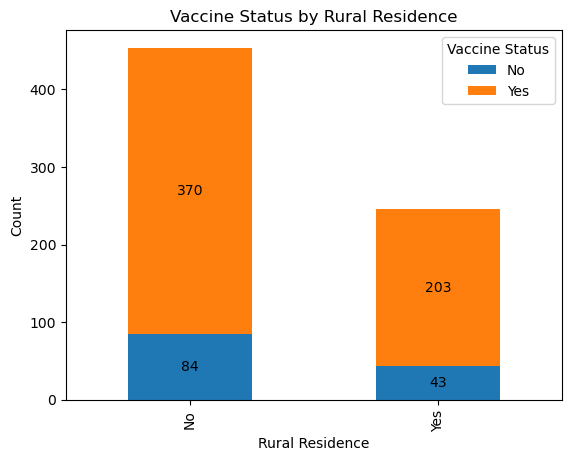

In [57]:
contingency_table.plot(kind='bar', stacked=True)

# this for loop is to add numbers to the bar sections. I thought that might be fancier
for i, (index, row) in enumerate(contingency_table.iterrows()):
    cum_value = 0
    for col in contingency_table.columns:
        value = row[col]
        plt.text(i, cum_value + value / 2, int(value), ha='center', va='center')
        cum_value += value

plt.title('Vaccine Status by Rural Residence')
plt.xlabel('Rural Residence')
plt.ylabel('Count')
plt.legend(title='Vaccine Status')
plt.show()

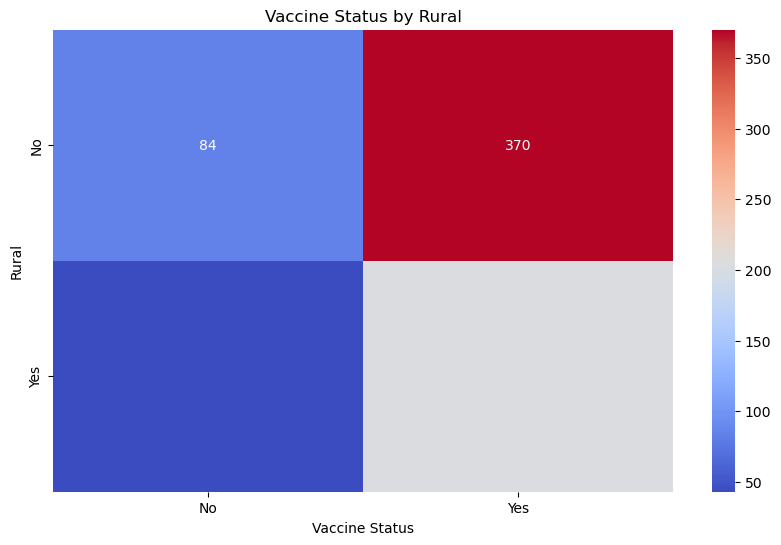

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Vaccine Status by Rural')
plt.xlabel('Vaccine Status')
plt.ylabel('Rural')
plt.show()

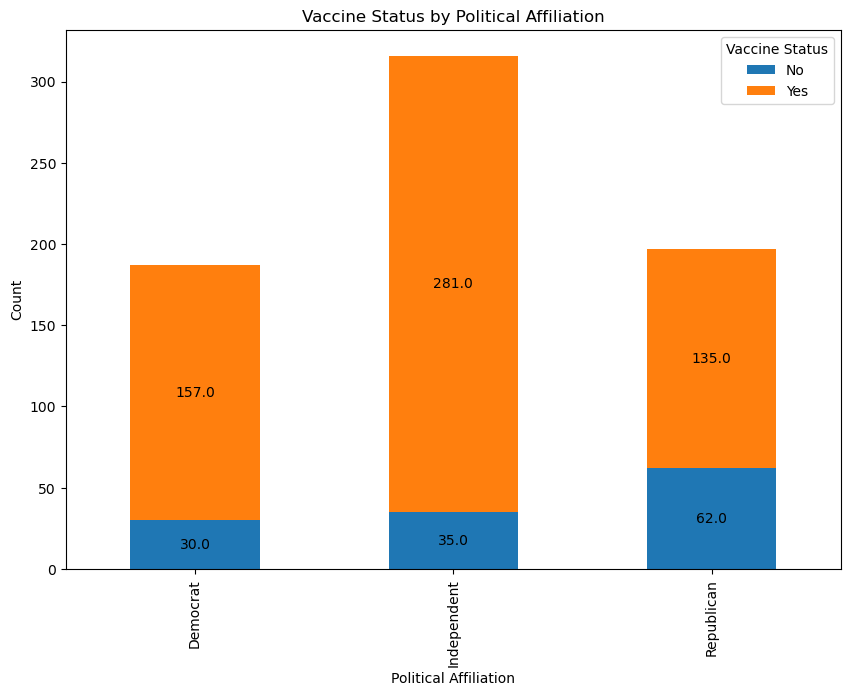

In [59]:
politics_vaccine_table = pd.crosstab(df_organized_us_20208['POLITICS'], df_organized_us_20208['VACCINE STATUS'])

# Plot the stacked bar chart
ax = politics_vaccine_table.plot(kind='bar', stacked=True, figsize=(10, 7))

# Annotate value labels to each section of the stacked bars
for c in ax.containers:
    # Optional: if the segment is too small, don't label it
    labels = [v.get_height() if v.get_height() > 10 else '' for v in c]
    ax.bar_label(c, label_type='center', labels=labels)

plt.title('Vaccine Status by Political Affiliation')
plt.xlabel('Political Affiliation')
plt.ylabel('Count')
plt.legend(title='Vaccine Status')
plt.show()

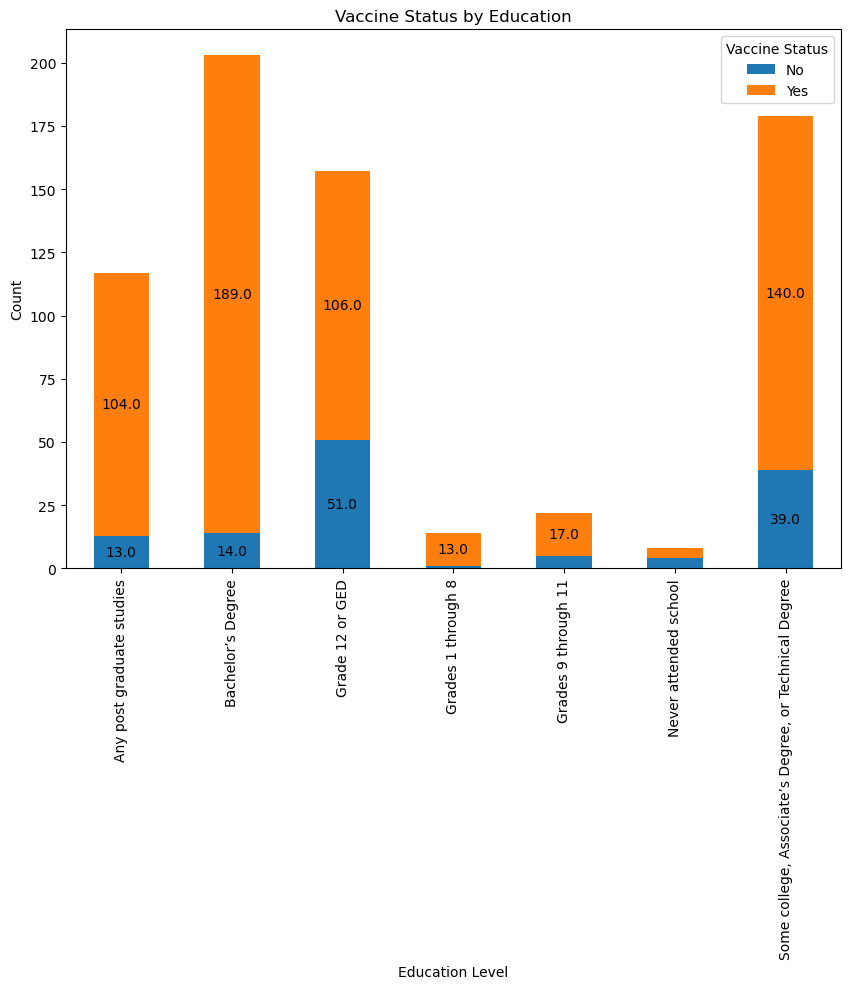

In [60]:
education_vaccine_table = pd.crosstab(df_organized_us_20208['EDUCATION'], df_organized_us_20208['VACCINE STATUS'])

# Plot the stacked bar chart
ax = education_vaccine_table.plot(kind='bar', stacked=True, figsize=(10, 7))

# Annotate value labels to each section of the stacked bars
for c in ax.containers:
    # Optional: if the segment is too small, don't label it
    labels = [v.get_height() if v.get_height() > 10 else '' for v in c]
    ax.bar_label(c, label_type='center', labels=labels)

plt.title('Vaccine Status by Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Vaccine Status')
plt.show()